<a href="https://colab.research.google.com/github/tctamedie/EventManagement/blob/BDA/FraudDetectionCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
fraudTest = pd.read_csv('fraudTest.csv')
fraudTrain = pd.read_csv('fraudTrain.csv')

In [3]:
data= pd.concat([fraudTrain, fraudTest], ignore_index=True)

In [4]:
import datetime
from calendar import monthrange
import dateutil.relativedelta

def birthday(date: str) -> float:
    """
    Calculates the age in years (with fractional months and days)
    based on the given birthday string in 'YYYY-MM-DD' format.
    """
    # Get the current UTC date
    now = datetime.datetime.utcnow().date()

    # Parse the input date
    birth_date = datetime.datetime.strptime(date, '%Y-%m-%d').date()

    # Calculate the difference
    age = dateutil.relativedelta.relativedelta(now, birth_date)

    # Get the number of days in the current month
    days_in_month = monthrange(now.year, now.month)[1]

    # Return precise age in years
    return age.years + age.months / 12 + age.days / (days_in_month * 12)


In [5]:
data = data.assign(age=data['dob'].apply(birthday))

In [6]:
data['age_group'] = pd.cut( data['age'],    bins=[-np.inf, 17, 25, 35, 45, 55, np.inf],
    labels=["0-17", "18-25", "26-35", "36-45", "46-55", "56+"],
)

In [7]:
data['amount_range'] = pd.qcut( data['amt'], 5,    labels=["Very low","low", "medium", "high", "very high"]
)

In [8]:
data['fraudulent'] = data['is_fraud'].map({0:'No', 1:'Yes'})

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957407 entries, 0 to 957406
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Unnamed: 0             957407 non-null  int64   
 1   trans_date_trans_time  957407 non-null  object  
 2   cc_num                 957407 non-null  int64   
 3   merchant               957407 non-null  object  
 4   category               957407 non-null  object  
 5   amt                    957407 non-null  float64 
 6   first                  957407 non-null  object  
 7   last                   957407 non-null  object  
 8   gender                 957407 non-null  object  
 9   street                 957407 non-null  object  
 10  city                   957407 non-null  object  
 11  state                  957407 non-null  object  
 12  zip                    957407 non-null  int64   
 13  lat                    957407 non-null  float64 
 14  long                

In [10]:
data.describe(include='object').transpose()

,count,unique,top,freq
trans_date_trans_time,957407,941723,2020-10-05 19:37:49,4
merchant,957407,693,fraud_Kilback LLC,3230
category,957407,14,gas_transport,97441
first,957407,347,Christopher,19929
last,957407,477,Smith,21051
gender,957407,2,F,524323
street,957407,954,2924 Bobby Trafficway,2352
city,957407,873,Birmingham,4138
state,957407,51,TX,69741
job,957407,486,Film/video editor,7142


In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,957407.0,2.410794e+05,1.411409e+05,0.000000e+00,1.196755e+05,2.393510e+05,3.590270e+05,5.193790e+05
cc_num,957407.0,4.180036e+17,1.310051e+18,6.041621e+10,1.800400e+14,3.520550e+15,4.642255e+15,4.992346e+18
amt,957407.0,6.997725e+01,1.545359e+02,1.000000e+00,9.640000e+00,4.743000e+01,8.317000e+01,2.508694e+04
zip,957407.0,4.878381e+04,2.688796e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.201100e+04,9.992100e+04
lat,957407.0,3.853787e+01,5.067965e+00,2.002710e+01,3.466890e+01,3.935430e+01,4.189480e+01,6.669330e+01
long,957407.0,-9.021078e+01,1.374433e+01,-1.656723e+02,-9.679800e+01,-8.746160e+01,-8.015800e+01,-6.795030e+01
city_pop,957407.0,8.871511e+04,3.017579e+05,2.300000e+01,7.430000e+02,2.443000e+03,2.032800e+04,2.906700e+06
unix_time,957406.0,1.355651e+09,2.189884e+07,1.325376e+09,1.335732e+09,1.343519e+09,1.377867e+09,1.386327e+09
merch_lat,957406.0,3.853738e+01,5.102159e+00,1.902742e+01,3.474687e+01,3.936916e+01,4.195344e+01,6.751027e+01
merch_long,957406.0,-9.021099e+01,1.375673e+01,-1.666716e+02,-9.688177e+01,-8.741774e+01,-8.022668e+01,-6.695203e+01


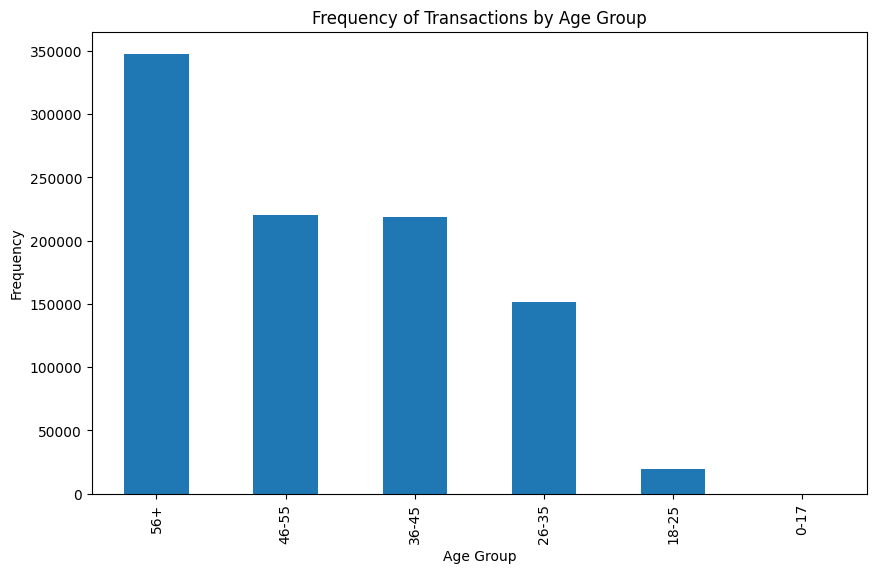

In [12]:
data['age_group'].value_counts().plot(kind='bar', figsize=(10, 6), title='Frequency of Transactions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.show()

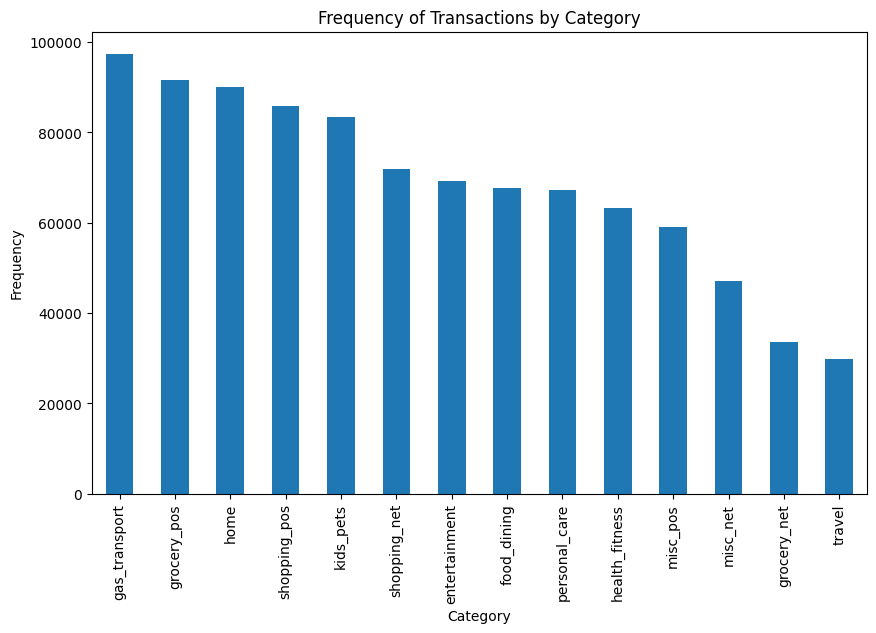

In [13]:
data['category'].value_counts().plot(kind='bar', figsize=(10, 6), title='Frequency of Transactions by Category')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

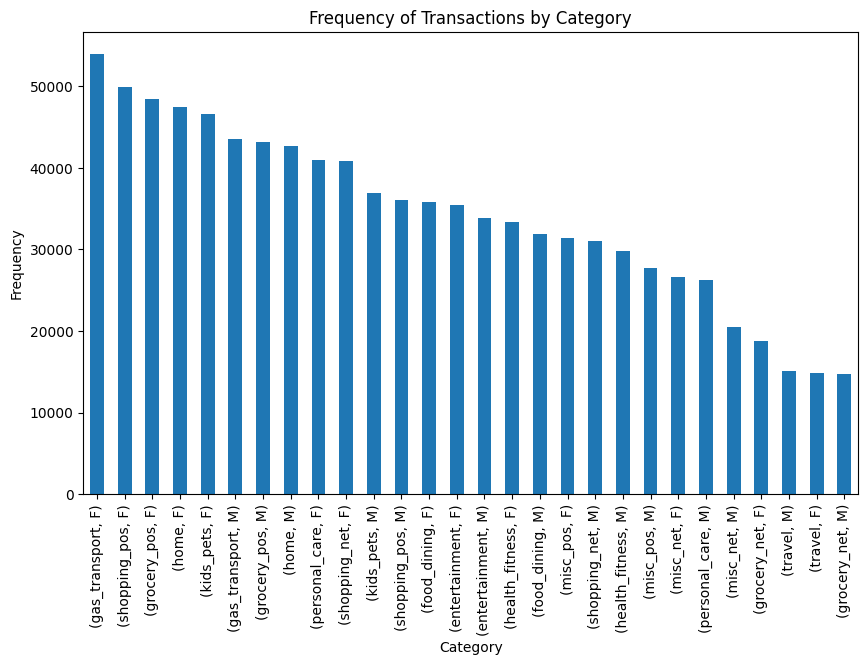

In [14]:
data[['category','gender']].value_counts().plot(kind='bar', figsize=(10, 6), title='Frequency of Transactions by Category')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

In [15]:
# bar charts for categorical data
def pivotToBarChart(data, indexBy, aggregateBy, values, title, xlabel,
                    ylabel,aggfunc='count', anchor=(1.04, 1),
                    anchor_location='upper left', figsize=(10,4),
                    fill_value=0, stacked=False, show_proportions=False):
    pivot_df = data.pivot_table(index=indexBy, columns=aggregateBy, values=values, aggfunc= aggfunc, fill_value=0)
    row_pivot = pivot_df
    if show_proportions == True:
        pivot_df = pivot_df.div(pivot_df.sum(1).astype(float), axis=0)
    pivot_df.plot(kind='bar',figsize=(10,6), stacked=stacked)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(bbox_to_anchor=anchor, loc=anchor_location)
    plt.show()
    return row_pivot

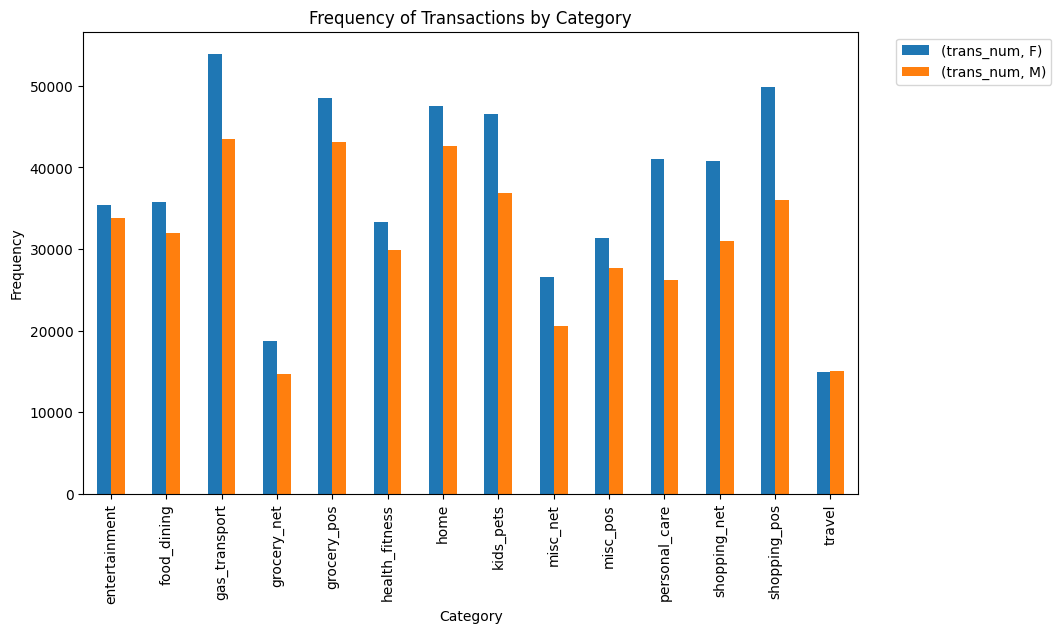

In [16]:
###############################################################
#       Relationship between gender, hypertension, and age    #
###############################################################
pivot_df = pivotToBarChart(data=data,indexBy=['category'],
                           aggregateBy=['gender'],
                           values=['trans_num'],
                           xlabel='Category',
                           ylabel='Frequency',
                           title='Frequency of Transactions by Category')

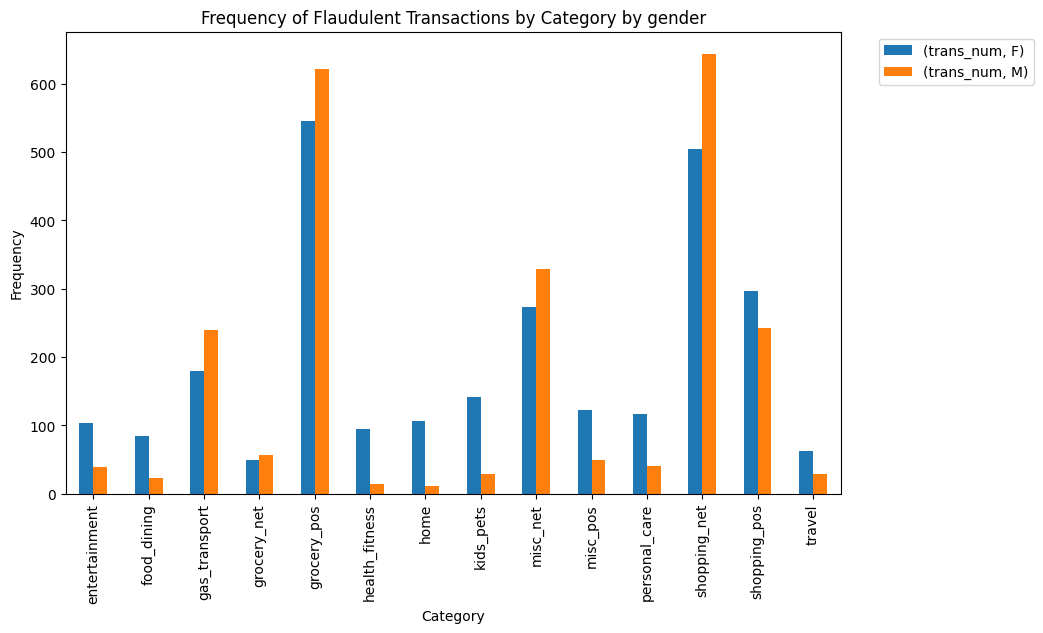

In [17]:
###############################################################
#       Relationship between gender, hypertension, and age    #
###############################################################
_data=data[data['is_fraud']==1]
pivot_df = pivotToBarChart(data=_data,indexBy=['category'],
                           aggregateBy=['gender'],
                           values=['trans_num'],
                           xlabel='Category',
                           ylabel='Frequency',
                           title='Frequency of Flaudulent Transactions by Category by gender')

In [18]:
most_dangerous_cities = _data.groupby('city').size().reset_index(name='count').sort_values('count', ascending=False).head(20)
most_dangerous_cities['city']
dangerous_city_data = _data[_data['city'].isin(most_dangerous_cities['city'])]

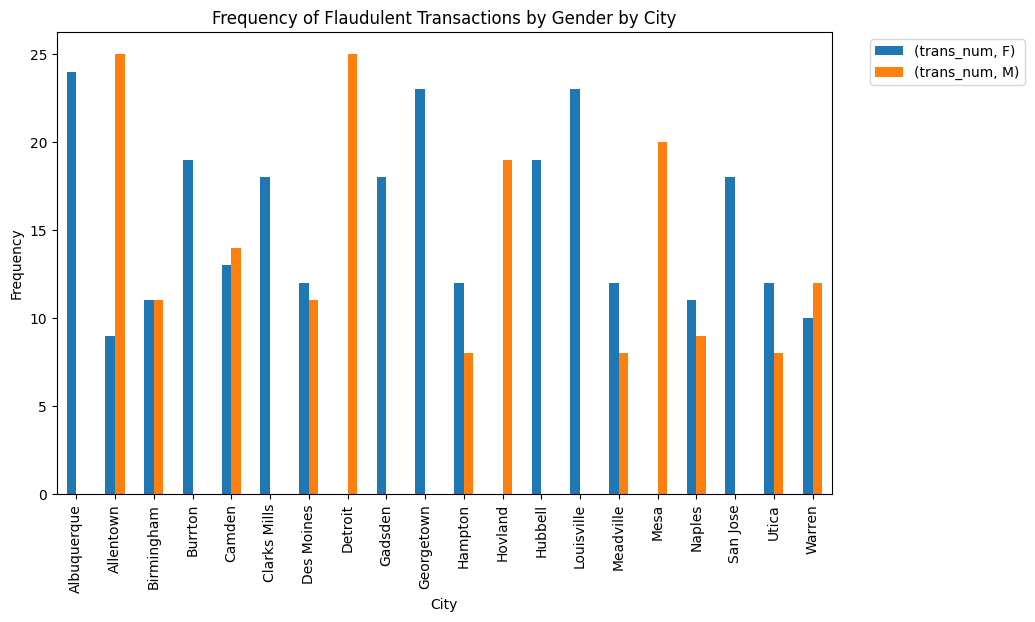

In [19]:
pivot_df = pivotToBarChart(data=dangerous_city_data,indexBy=['city'],
                           aggregateBy=['gender'],
                           values=['trans_num'],
                           xlabel='City',
                           ylabel='Frequency',
                           title='Frequency of Flaudulent Transactions by Gender by City')

<ipython-input-15-a2b46c4821fe>:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = data.pivot_table(index=indexBy, columns=aggregateBy, values=values, aggfunc= aggfunc, fill_value=0)


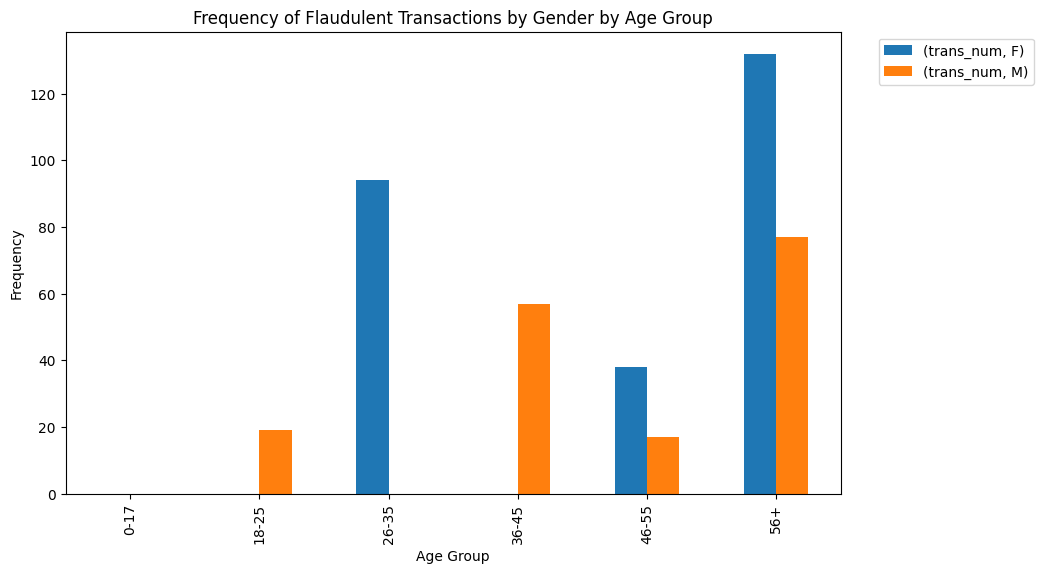

In [20]:
pivot_df = pivotToBarChart(data=dangerous_city_data,indexBy=['age_group'],
                           aggregateBy=['gender'],
                           values=['trans_num'],
                           xlabel='Age Group',
                           ylabel='Frequency',
                           title='Frequency of Flaudulent Transactions by Gender by Age Group')

<ipython-input-15-a2b46c4821fe>:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = data.pivot_table(index=indexBy, columns=aggregateBy, values=values, aggfunc= aggfunc, fill_value=0)


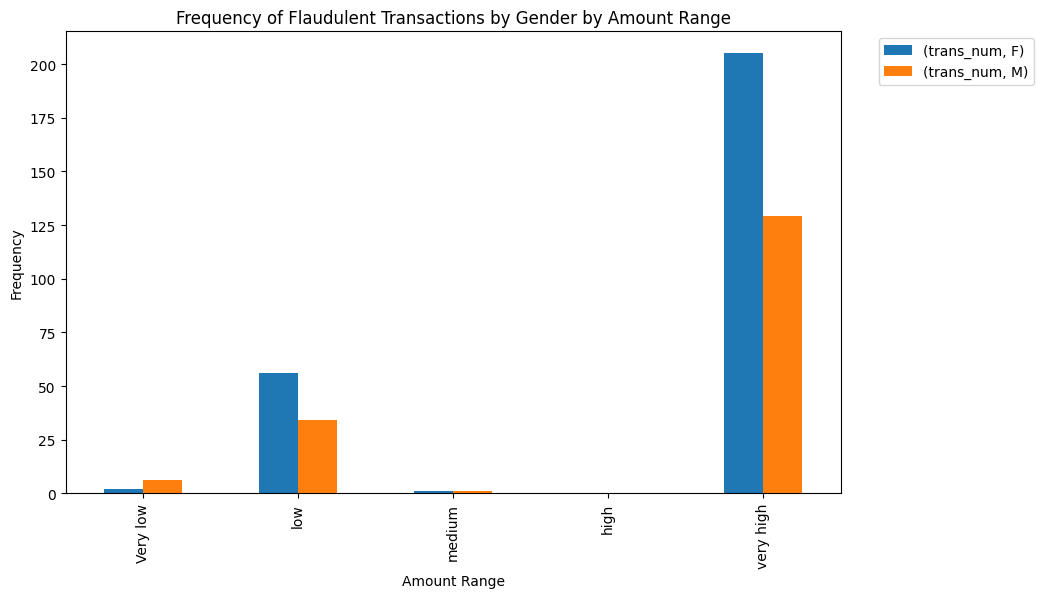

In [21]:
pivot_df = pivotToBarChart(data=dangerous_city_data,indexBy=['amount_range'],
                           aggregateBy=['gender'],
                           values=['trans_num'],
                           xlabel='Amount Range',
                           ylabel='Frequency',
                           title='Frequency of Flaudulent Transactions by Gender by Amount Range')

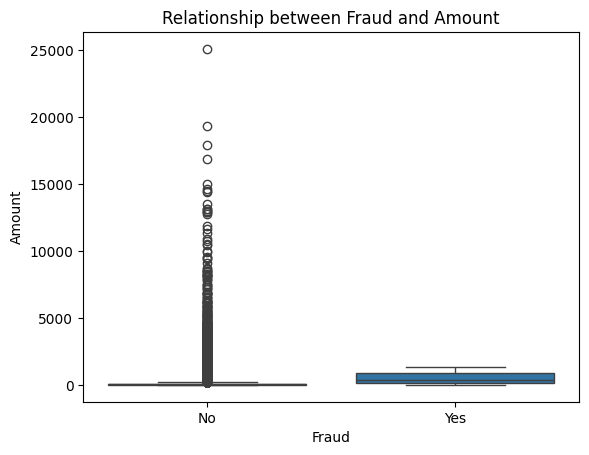

In [22]:
sns.boxplot(x='fraudulent', y='amt', data=data)
plt.title('Relationship between Fraud and Amount')
plt.xlabel('Fraud')
plt.ylabel('Amount')
plt.show()

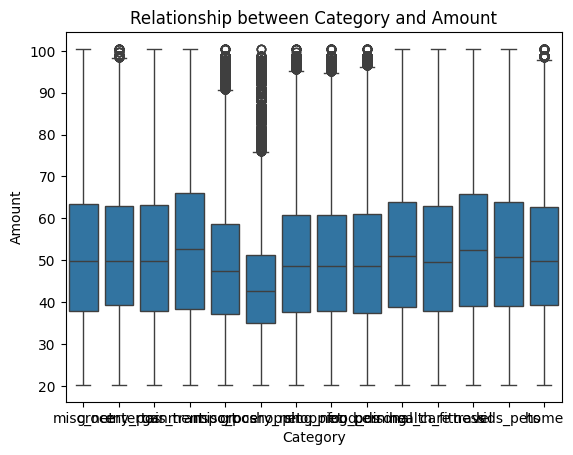

In [29]:
sns.boxplot(x='category', y='age', data=data)
plt.title('Relationship between Category and Amount')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.show()

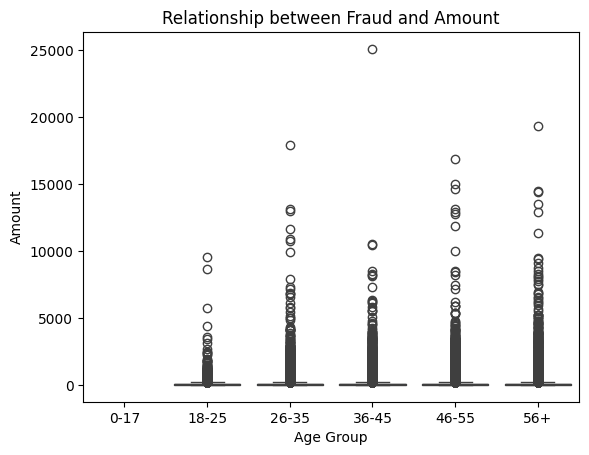

In [24]:
sns.boxplot(x='age_group', y='amt', data=data)
plt.title('Relationship between Fraud and Amount')
plt.xlabel('Age Group')
plt.ylabel('Amount')
plt.show()

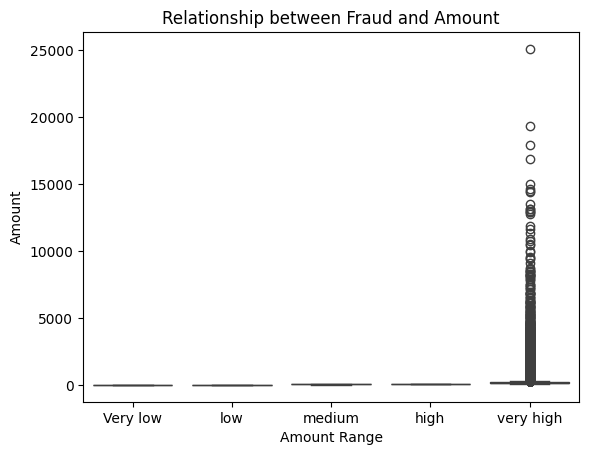

In [25]:
sns.boxplot(x='amount_range', y='amt', data=data)
plt.title('Relationship between Fraud and Amount')
plt.xlabel('Amount Range')
plt.ylabel('Amount')
plt.show()

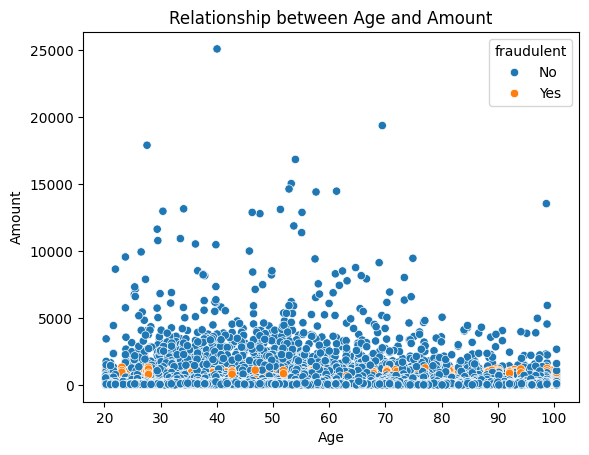

In [26]:
sns.scatterplot(x='age', y='amt', hue='fraudulent', data=data)
plt.title('Relationship between Age and Amount')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.show()

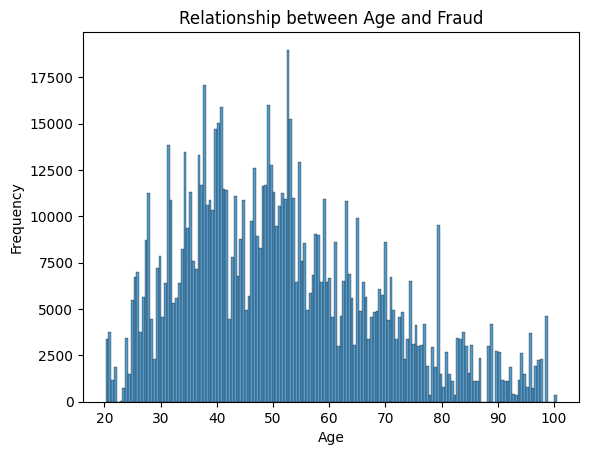

In [27]:
sns.histplot(data=data, x='age')
plt.title('Relationship between Age and Fraud')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

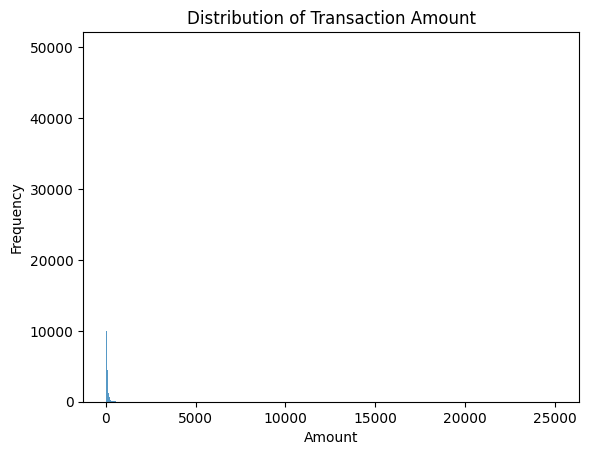

In [28]:
sns.histplot(data=data, x='amt')
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [30]:
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,age_group,amount_range,fraudulent
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0,37.111111,36-45,Very low,No
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0,46.830556,46-55,very high,No
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0,63.250000,56+,very high,No
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0,58.269444,56+,medium,No
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0,39.061111,36-45,medium,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957402,438022,2020-12-06 10:51:12,38295635583927,fraud_Cole PLC,grocery_pos,103.95,Candice,Brown,F,9412 Harris Mews,...,1983-06-14,01098b850a9cb825df1539290bbf1f30,1.386327e+09,32.564689,-100.196288,0.0,41.847222,36-45,very high,No
957403,438023,2020-12-06 10:51:39,4914700582394237,fraud_Bogisich Inc,grocery_pos,66.30,John,Williams,M,8929 Phillips Corners Suite 259,...,1956-05-01,4b0ee6efd5927213d9be0590e6e40230,1.386327e+09,40.299846,-79.836543,0.0,68.966667,56+,high,No
957404,438024,2020-12-06 10:51:39,3587960728692500,fraud_Emard Inc,gas_transport,43.92,Kathy,Hughes,F,02110 Lucas Freeway Suite 517,...,1997-01-02,1e3e31f24fc7eace04675041b73d57b4,1.386327e+09,42.374396,-96.533738,0.0,28.297222,26-35,medium,No
957405,438025,2020-12-06 10:51:55,180036456789979,fraud_Schmitt Inc,gas_transport,40.29,Mackenzie,Salazar,F,982 Melissa Lock,...,1974-11-20,0807ff25566a2fb4763aaab9f758a1ec,1.386327e+09,43.084161,-91.764143,0.0,50.416667,46-55,medium,No
